In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score

In [ ]:

fraud = pd.read_csv('creditcard.csv')

In [ ]:
#compute accuracy of baseline where no fraud is detected

fraud['Class'].value_counts()

284315/(284315 + 492)

0.9982725143693799

In [ ]:
fraud['Amount']=(fraud['Amount']-fraud['Amount'].mean())/fraud['Amount'].std()

In [ ]:
X = fraud.drop(['Class', 'Time'], axis =1)

In [ ]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342474
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160684
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350150
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254116
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313248


In [ ]:
y = fraud['Class']

In [ ]:
train, test = train_test_split(fraud, test_size = 0.3, random_state = 42)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [ ]:
logit_regression = smf.logit("Class ~ V1 + V2 + V3 + V4 + V5 + V6 + V7 + V8 + V9 + V10 + V11 + V12 + V13 + V14 + V15 + V16 + V17 + V18 + V19 + V20 + V21 + V22 + V23 + V24 + V25 + V26 + V27 + V28 + Amount", data = train)
logit_results = logit_regression.fit()
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.004117
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               199364
Model:                          Logit   Df Residuals:                   199334
Method:                           MLE   Df Model:                           29
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.6853
Time:                        03:59:49   Log-Likelihood:                -820.83
converged:                       True   LL-Null:                       -2608.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5538      0.164    -52.000      0.000      -8.876      -8.231
V1             0.0891      0

In [ ]:
test['PredictedFraud'] = (logit_results.predict(test) > 0.5).astype(int)
pd.crosstab(test['Class'], test['PredictedFraud'])

PredictedFraud,0,1
Class,,
0,85295,12
1,51,85


In [ ]:
51 / (85295 + 51)

0.0005975675485670095

In [ ]:
85/(12+85)

0.8762886597938144

In [ ]:
accuracy_score(test['Class'], test['PredictedFraud'])

0.9992626663389628

In [ ]:
#recommended by the Kaggle page to evaluate model peformance
auprc_logit = average_precision_score(test['Class'], test['PredictedFraud'])

In [ ]:
auprc_logit

0.5482773015253071

In [ ]:
#This is a test function to try differnt logit regression functions

logit_regression_test = smf.logit("Class ~ V1 + V4 + V6 + V7 + V8 + V10 + V13 + V14 + V16 + V19 + V20 + V21 + V22 + V27 + V28 + Amount", data = train)
logit_results_test = logit_regression_test.fit()
print(logit_results_test.summary())

test['PredictedFraud_test'] = (logit_results_test.predict(test) > 0.5).astype(int)
pd.crosstab(test['Class'], test['PredictedFraud_test'])

print(accuracy_score(test['Class'], test['PredictedFraud_test']))
auprc_logit_test = average_precision_score(test['Class'], test['PredictedFraud_test'])
print(auprc_logit_test)

Optimization terminated successfully.
         Current function value: 0.004149
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               199364
Model:                          Logit   Df Residuals:                   199347
Method:                           MLE   Df Model:                           16
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.6829
Time:                        03:59:52   Log-Likelihood:                -827.19
converged:                       True   LL-Null:                       -2608.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5632      0.151    -56.534      0.000      -8.860      -8.266
V1             0.1038      0

###CART Model

In [ ]:
dt_10=DecisionTreeClassifier(min_samples_leaf=10)
dt_10.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10)

In [ ]:
dt_50=DecisionTreeClassifier(min_samples_leaf=50)
dt_50.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=50)

In [ ]:
dt_100=DecisionTreeClassifier(min_samples_leaf=100)
dt_100.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=100)

In [ ]:
dt_test = DecisionTreeClassifier(min_samples_leaf=9)
dt_test.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_leaf=9)

In [ ]:
y_pred_test=dt_test.predict(x_test)
accuracy_cart_test = accuracy_score(y_test, y_pred_test)
accuracy_cart_test

0.9995435553526912

In [ ]:
auprc_CART_test = average_precision_score(test['Class'], y_pred_test)
auprc_CART_test

0.7223019019391805

In [ ]:
pd.crosstab(test['Class'], y_pred_test)

col_0,0,1
Class,,
0,85295,12
1,27,109


In [ ]:
y_pred_10=dt_10.predict(x_test)
accuracy_cart_10 = accuracy_score(y_test, y_pred_10)
accuracy_cart_10

0.9994967405170698

In [ ]:
y_pred_50=dt_50.predict(x_test)
accuracy_cart_50 = accuracy_score(y_test, y_pred_50)
accuracy_cart_50

0.9990402958697612

In [ ]:
y_pred_100=dt_100.predict(x_test)
accuracy_cart_100 = accuracy_score(y_test, y_pred_100)
accuracy_cart_100

0.9991105181231933

In [ ]:
auprc_CART = average_precision_score(test['Class'], y_pred_10)
auprc_CART

0.7008601093078708

In [ ]:
pd.crosstab(test['Class'], y_pred_10)

col_0,0,1
Class,,
0,85290,17
1,26,110


class_weight = {0: 1, 1:4}

In [ ]:
26/(85292+26)

0.00030474225837455167

In [ ]:
creditcard_rf = RandomForestClassifier(n_estimators = 100, min_samples_leaf= 40, random_state = 42)
creditcard_rf.fit(x_train, y_train)
y_pred_rf = creditcard_rf.predict(x_test)

acc_rf = accuracy_score(y_test, y_pred_rf)

In [ ]:
acc_rf

0.9992158515033414

In [ ]:
auprc_rf = average_precision_score(test['Class'], y_pred_rf)
auprc_rf

0.5327223057899638

In [ ]:
pd.crosstab(test['Class'], y_pred_rf)

col_0,0,1
Class,,
0,85288,19
1,48,88


In [ ]:
88 / (88+19)

0.822429906542056

In [ ]:
48 / (85288 + 48)

0.0005624824224242992

[Text(0.18935590920989046, 0.975, 'x[16] <= -2.769\ngini = 0.004\nsamples = 199364\nvalue = [199008, 356]'),
 Text(0.09278350515463918, 0.925, 'x[11] <= -1.925\ngini = 0.337\nsamples = 303\nvalue = [65, 238]'),
 Text(0.08247422680412371, 0.875, 'x[25] <= -0.257\ngini = 0.283\nsamples = 287\nvalue = [49, 238]'),
 Text(0.041237113402061855, 0.825, 'x[25] <= -0.337\ngini = 0.476\nsamples = 77\nvalue = [30, 47]'),
 Text(0.020618556701030927, 0.775, 'x[13] <= -3.787\ngini = 0.172\nsamples = 42\nvalue = [4, 38]'),
 Text(0.010309278350515464, 0.725, 'gini = 0.0\nsamples = 31\nvalue = [0, 31]'),
 Text(0.030927835051546393, 0.725, 'gini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.061855670103092786, 0.775, 'x[13] <= -8.764\ngini = 0.382\nsamples = 35\nvalue = [26, 9]'),
 Text(0.05154639175257732, 0.725, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.07216494845360824, 0.725, 'gini = 0.498\nsamples = 17\nvalue = [8, 9]'),
 Text(0.12371134020618557, 0.825, 'x[13] <= -3.43\ngini = 0.16

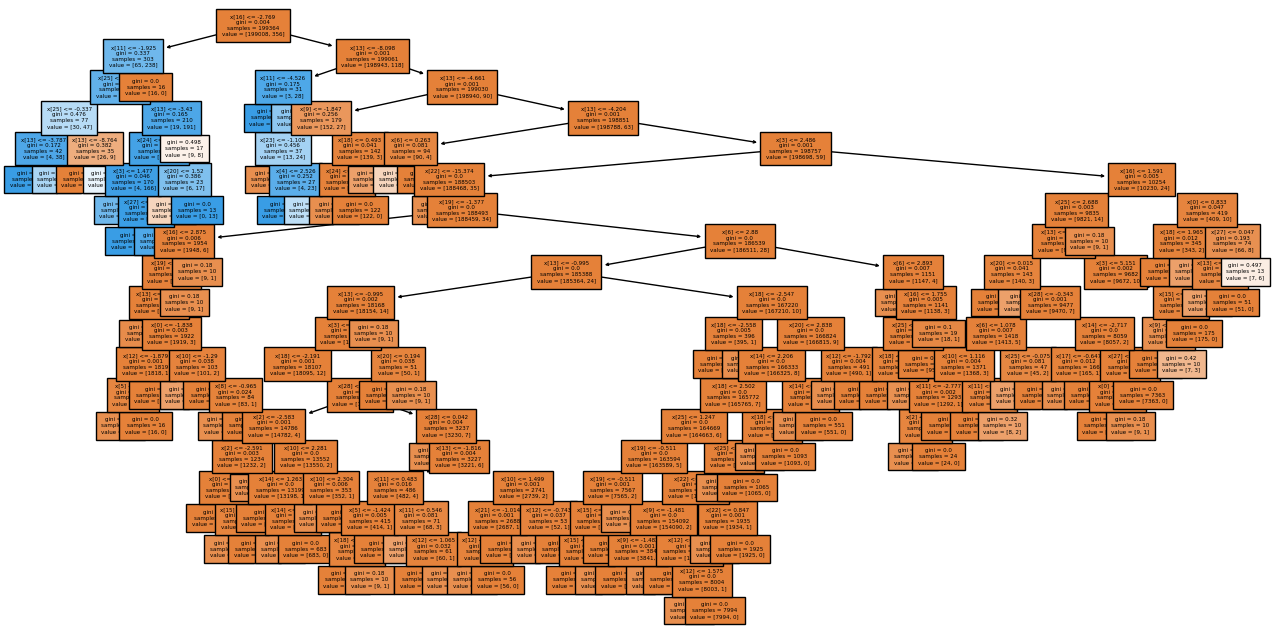

In [ ]:
plt.figure(figsize = (16,8))
plot_tree(dt_10, fontsize = 4,  filled = True)

In [ ]:
print(x_train.columns[18])

V19


In [ ]:
lin_model=smf.ols("Class ~ V1 + V4 + V6 + V7 + V8 + V10 + V13 + V14 + V16 + V19 + V20 + V21 + V22 + V27 + V28 + Amount", data = train)

In [ ]:
result_lin = lin_model.fit()
print(result_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                  Class   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     4006.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        04:06:28   Log-Likelihood:             3.7587e+05
No. Observations:              199364   AIC:                        -7.517e+05
Df Residuals:                  199347   BIC:                        -7.515e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0018   8.23e-05     21.619      0.0